In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.convolve([1, 2], [2, 2, 2])

array([2, 6, 6, 4])

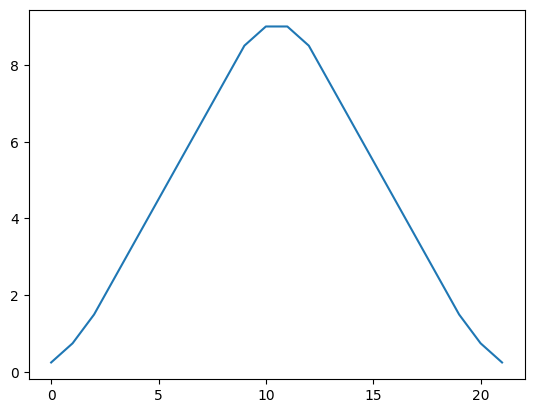

In [14]:
kernel = [.25, .25, .25, .25]
function = [1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1]
convolution = np.convolve(kernel, function)

plt.plot(convolution)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


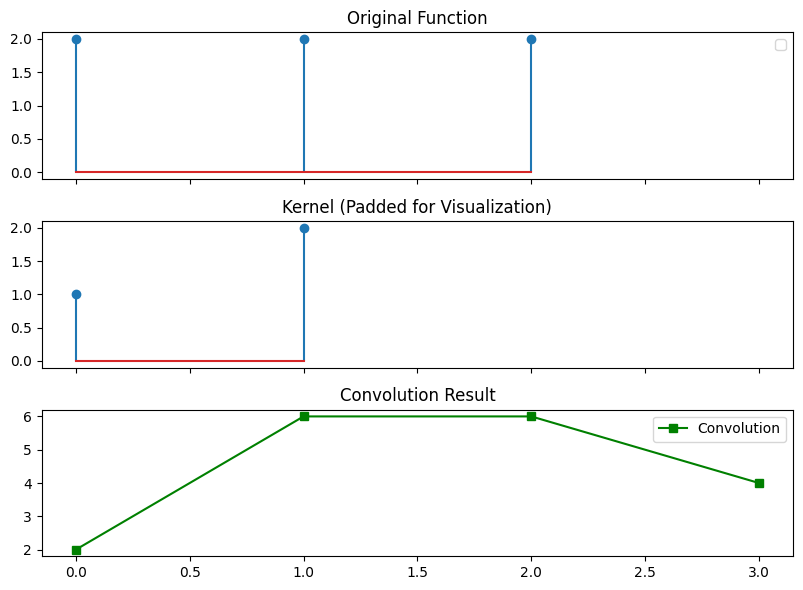

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define kernel and function
kernel = np.array([1, 2])
function = np.array([2, 2, 2])

# Perform convolution
convolution = np.convolve(function, kernel)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Plot the function
axes[0].stem(function, linefmt = None)
axes[0].set_title('Original Function')
axes[0].legend()

# Plot the kernel with padding
axes[1].stem(kernel)
axes[1].set_title('Kernel')

# Plot the convolution
axes[2].plot(convolution, marker='s', linestyle='-', color='g', label='Convolution')
axes[2].set_title('Convolution Result')
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Filtered image saved as 'edge_tilly.jpg'


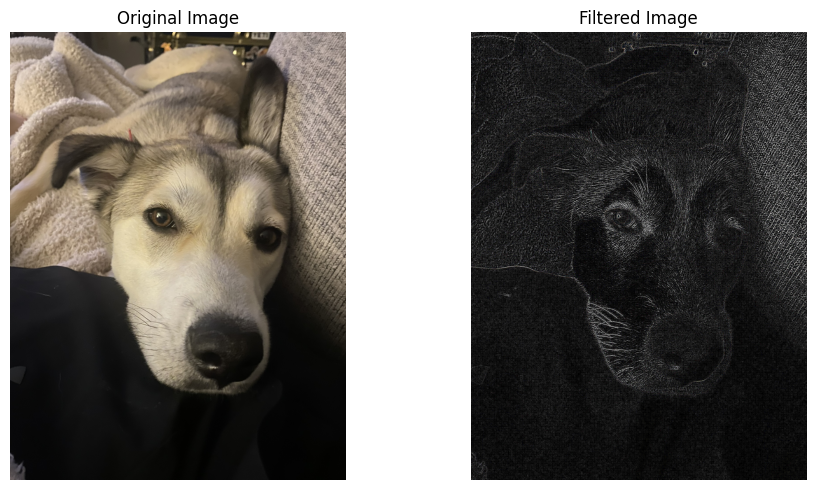

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color (OpenCV loads as BGR by default)
image = cv2.imread("raw_image_files/IMG_5195.JPEG")

if image is None:
    print("Error: Could not load image. Check file path.")
    exit()

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a convolutional kernel (Edge Detection)
kernel = 1 * np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]], dtype=np.float32)

kernel = 4 * np.array([[1,1,1],
                        [1,-8, 1],
                        [1, 1, 1]], dtype=np.float32)


# Split the image into its color channels (R, G, B)
r, g, b = cv2.split(image)

# Apply convolution to each channel separately
r_filtered = cv2.filter2D(r, -1, kernel)
g_filtered = cv2.filter2D(g, -1, kernel)
b_filtered = cv2.filter2D(b, -1, kernel)

# Merge the filtered channels back into an RGB image
filtered_image = cv2.merge([r_filtered, g_filtered, b_filtered])

# Convert filtered image back to BGR for saving with OpenCV
filtered_image_bgr = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR)

# Save the filtered image
cv2.imwrite("laplacian_tilly.jpg", filtered_image_bgr)
print("Filtered image saved as 'edge_tilly.jpg'")


# Plot original and filtered images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Filtered image
axes[1].imshow(filtered_image)
axes[1].set_title("Filtered Image")
axes[1].axis("off")

# Show the plots
plt.tight_layout()
plt.show()



Filtered image saved as 'blurred_tilly.jpg'


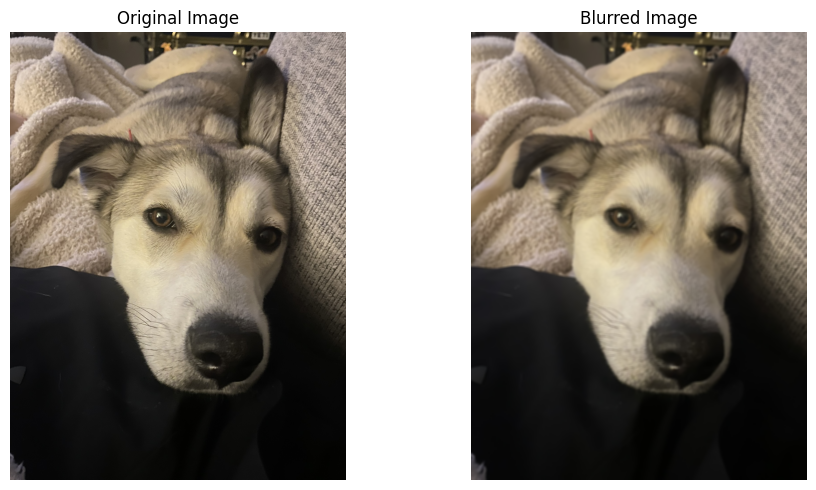

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color (OpenCV loads as BGR by default)
image = cv2.imread("raw_image_files/IMG_5195.JPEG")

if image is None:
    print("Error: Could not load image. Check file path.")
    exit()

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)  # Convert to float32 for better precision

# Define a proper blurring kernel (Box Blur)
kernel = np.ones((13, 13), dtype=np.float32) / 169  # 5x5 blur instead of 3x3

# Split the image into its color channels (R, G, B)
r, g, b = cv2.split(image)

# Apply convolution to each channel separately
r_filtered = cv2.filter2D(r, -1, kernel)
g_filtered = cv2.filter2D(g, -1, kernel)
b_filtered = cv2.filter2D(b, -1, kernel)

# Merge the filtered channels back into an RGB image
filtered_image = cv2.merge([r_filtered, g_filtered, b_filtered])

# Convert back to uint8 before saving
filtered_image_uint8 = np.clip(filtered_image, 0, 255).astype(np.uint8)

# Convert filtered image back to BGR for saving with OpenCV
filtered_image_bgr = cv2.cvtColor(filtered_image_uint8, cv2.COLOR_RGB2BGR)

# Save the filtered image
cv2.imwrite("blurred_tilly.jpg", filtered_image_bgr)
print("Filtered image saved as 'blurred_tilly.jpg'")

# Plot original and filtered images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(image.astype(np.uint8))  # Convert back to uint8 for display
axes[0].set_title("Original Image")
axes[0].axis("off")

# Filtered image
axes[1].imshow(filtered_image_uint8)
axes[1].set_title("Blurred Image")
axes[1].axis("off")

# Show the plots
plt.tight_layout()
plt.show()
